<a href="https://colab.research.google.com/github/puzlike/expert-octo-telegram/blob/main/Dice_chip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install japanize-matplotlib | tail -n 1

,チップ数,1回目,2回目,3回目,4回目,5回目,6回目,7回目,8回目,9回目,...,141回目,142回目,143回目,144回目,145回目,146回目,147回目,148回目,149回目,150回目
1,4,3,2,1,1,2,3,2,2,1,...,1,2,2,3,3,4,4,4,5,5
2,10,10,10,10,9,9,9,9,9,10,...,1,1,1,1,1,1,0,1,1,2
3,3,3,3,3,3,2,2,3,4,4,...,10,9,9,9,8,8,8,8,8,8
4,2,2,2,2,3,3,3,3,3,3,...,2,2,1,1,1,1,1,1,1,0
5,9,10,11,12,12,12,12,12,12,12,...,15,15,16,16,17,16,16,15,15,15
6,2,2,2,2,2,2,1,1,0,0,...,1,1,1,0,0,0,1,1,0,0


Text(0, 0.5, 'チップ数')

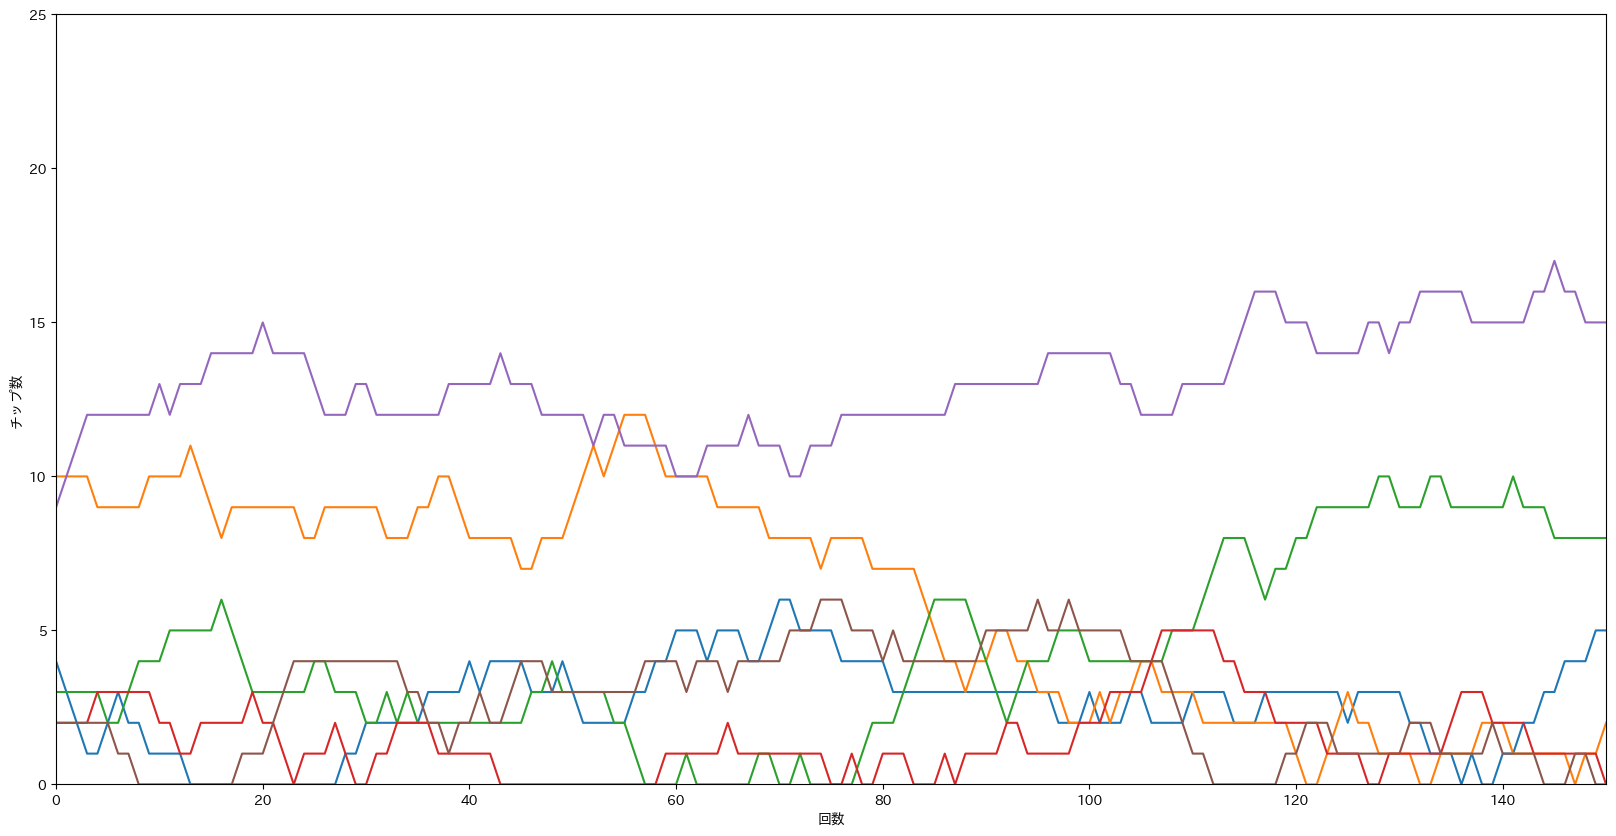

In [18]:
import random
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import pandas as pd

chips = [0 for n in range(6)]

for i in range(30):
    n = random.randint(1, 6)
    chips[n - 1] += 1

data = []
data_list = []
for i in range(6):
    data_list.append(i + 1)
    data.append([chips[i]])

df = pd.DataFrame(data, index=data_list, columns=['チップ数'])

for i in range(150):
    while True:
        n1 = random.randint(1, 6)
        if chips[n1 - 1] != 0:
            break
    chips[n1 - 1] -= 1
    while True:
        n2 = random.randint(1, 6)
        if n2 != n1:
            break
    chips[n2 - 1] += 1
    chip = pd.Series(np.array(chips), name=f'{i + 1}回目')
    chip.index = chip.index + 1
    df = pd.concat([df, chip], axis=1)
display(df)
x = range(0, 151)
y = []
plt.figure(figsize=(20, 10))
for i in range(6):
    y.append(list(df.iloc[i]))
    plt.plot(x, y[i],label=str(i))
plt.xlim(0, 150)
plt.ylim(0, 25)
plt.xlabel("回数")
plt.ylabel("チップ数")